In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['ps.fonttype'] = 42
rcParams['ps.useafm'] = True
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [3]:
hue_color_adjusted = True
hue_colors = ['tab:blue', 'tab:orange']
import seaborn as sns
def _get_brighter_color(color: str):
    new_color = sns.set_hls_values(color, l=0.7)
    # convert to hex string
    color_string = f"#{''.join([f'{int(val*255):02x}' for val in new_color])}"
    return color_string


if hue_color_adjusted:
    hue_colors = [_get_brighter_color(color) for color in hue_colors]

print(hue_colors)

['#7cbce8', '#ffad65']


In [4]:
from catrace.dataset import load_dataset_config
dataset_name = 'juvenile'
config_file = f'../dataset_configs/{dataset_name}_dataset.json'
dsconfig = load_dataset_config(config_file)

from analysis_config import juvenile_window_name_to_frames
window_name = 'time_window_5s'
window = juvenile_window_name_to_frames[window_name]



Plotting average trace...
2021-07-15-DpOBEM-N2_Dp None
Computing distance matrices...
Plotting per condition...
{'ncol': 2, 'row_height': 2.5, 'col_width': 2.5, 'title_fontsize': 7, 'colorbar_fontsize': 6, 'ylabel_fontsize': 7, 'ylabels': None, 'ylabel_colors': None, 'cmap': 'turbo', 'clim': None, 'color_norm': None, 'cbar_interval': 0.1}
clim: (0.5391880341880341, 0.844102564102564)
ylabel_ vfontsize: 7
ylabel_ vfontsize: 7
ylabel_ vfontsize: 7
ylabel_ vfontsize: 7
Plotting delta matrix...
Error for sample size 200: 'Requested level (manifold) does not match index name (odor)'
Plotting average trace...
2021-07-15-DpOBEM-N2_Dp None
Computing distance matrices...
Plotting per condition...
{'ncol': 2, 'row_height': 2.5, 'col_width': 2.5, 'title_fontsize': 7, 'colorbar_fontsize': 6, 'ylabel_fontsize': 7, 'ylabels': None, 'ylabel_colors': None, 'cmap': 'turbo', 'clim': [0.5391880341880341, 0.844102564102564], 'color_norm': None, 'cbar_interval': 0.1}
ylabel_ vfontsize: 7
ylabel_ vfontsize:

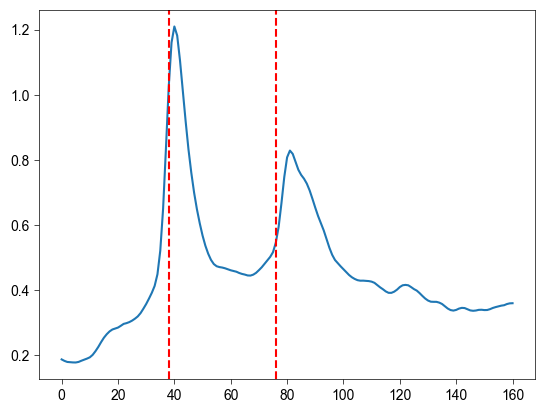

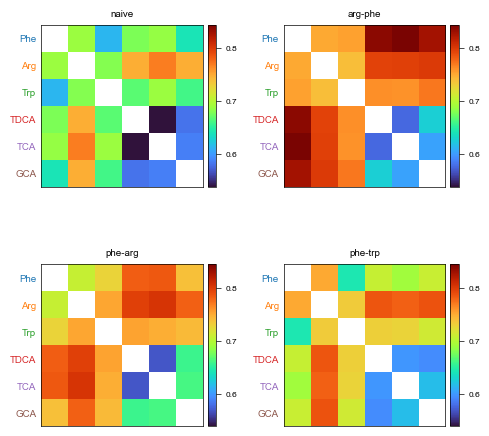

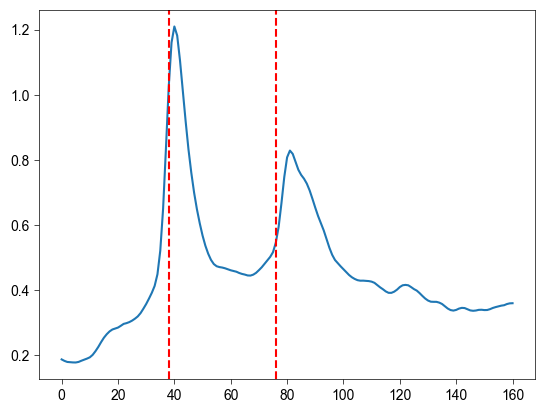

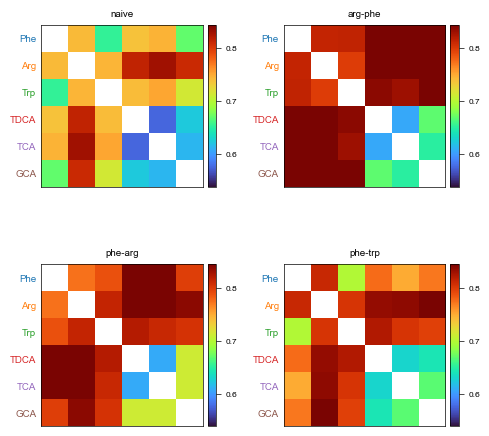

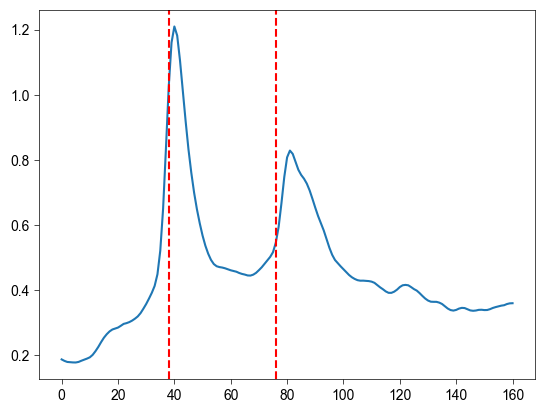

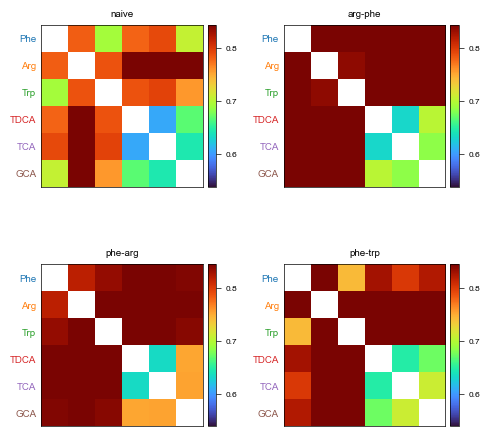

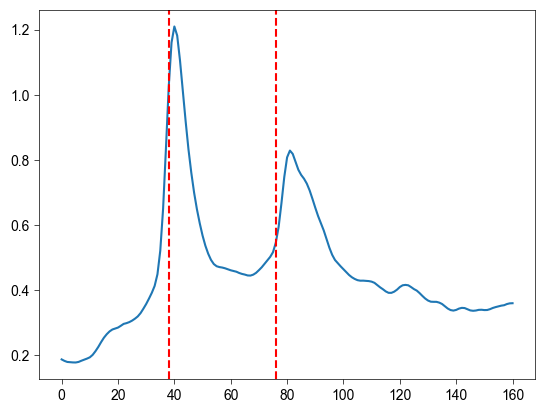

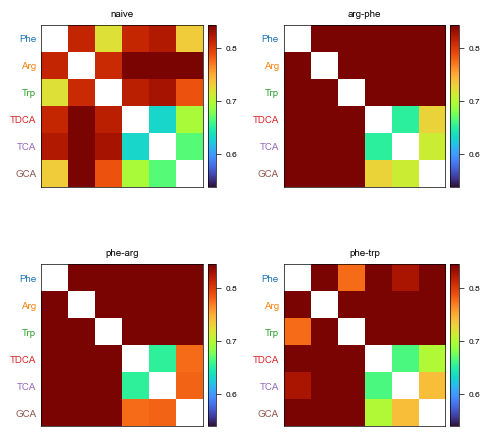

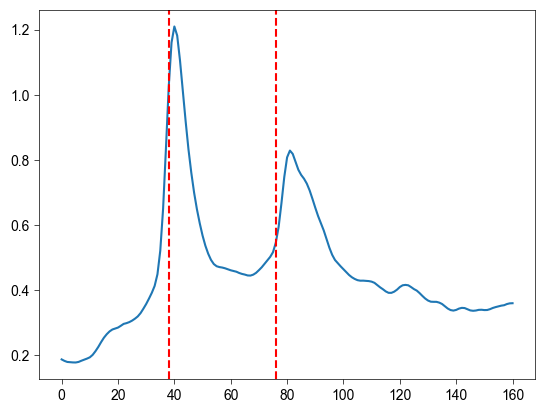

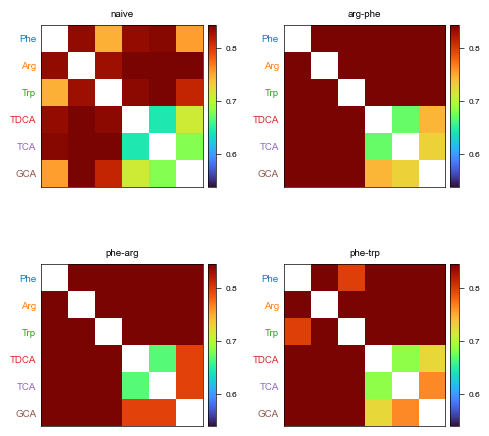

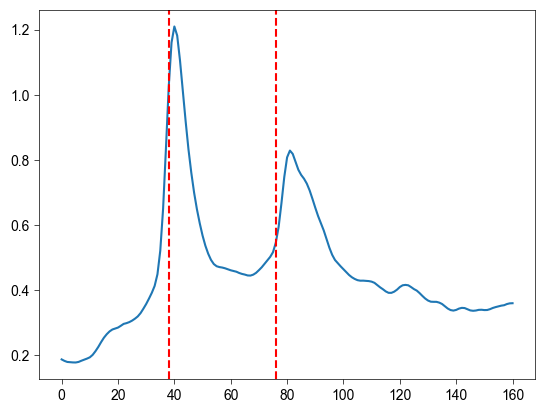

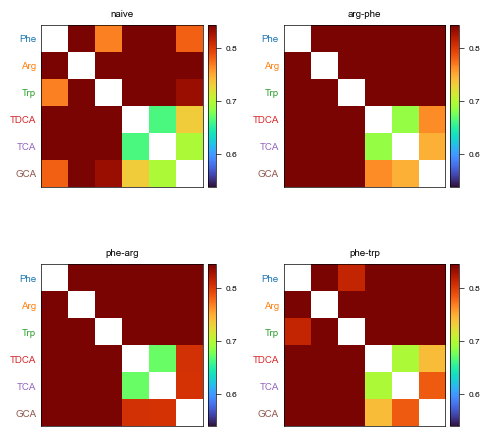

In [6]:
from catrace.run.run_distance import run_distance, RunDistanceParams, PlotDistanceParams, PlotPerCondMatParams, PlotMeanDeltaMatParams
from catrace.run.run_lda import run_lda_manifold_pair, RunLdaManifoldPairParams, ComputeLdaManifoldPairParams, LdaCrossValParameters


from catrace.visualize import PlotBoxplotMultiOdorCondParams
ylabels = None
ylabel_colors = None
hue_color_adjusted = False
hue_colors = ['tab:blue', 'tab:orange']
strip_hue_colors = ['gray', 'gray']
mean_hue_colors = ['tab:blue', 'tab:orange']
import seaborn as sns
def _get_brighter_color(color: str, l=0.85):
    new_color = sns.set_hls_values(color, l=0.85)
    return new_color
if hue_color_adjusted:
    hue_colors = [_get_brighter_color(color) for color in hue_colors]
    strip_hue_colors = [_get_brighter_color(color) for color in strip_hue_colors]
    mean_hue_colors = [_get_brighter_color(color, l=0.6) for color in mean_hue_colors]
plot_params = PlotDistanceParams(
    per_cond = PlotPerCondMatParams(
        row_height=2.5,#1.35,
        col_width=2.5,#1.35,
        title_fontsize=7,
        ylabel_fontsize=7,
        ylabel_colors = ylabel_colors,
        ylabels = ylabels,
        cbar_interval=0.1,
        clim = None,),
    mean_delta = PlotMeanDeltaMatParams(
        figsize=(2.5, 2.5),#(1.6, 1.6),
        colorbar_fontsize = 7,
        ylabel_fontsize = 7,
        ylabels = ylabels,
        ylabel_colors = ylabel_colors
    ),
    vs_measure = PlotBoxplotMultiOdorCondParams(
        figsize=(3.8, 1.8),
        label_fontsize=7,
        show_ns=True,
        box_linewidth=1,
        strip_size=0.5,
        mean_marker_size=1,
        pvalue_marker_xoffset=0.05,
        ylim=None,#(0, 935.6151218959913),
        hue_colors=hue_colors,
        strip_hue_colors=strip_hue_colors,
        mean_hue_colors=mean_hue_colors,
    )
)


params = RunLdaManifoldPairParams(
    config_file = config_file,
    compute_lda_params = ComputeLdaManifoldPairParams(
        in_dir = '',
        exp_list = dsconfig.exp_list,
        lda_cross_val_params = LdaCrossValParameters(
            k = 3,
            solver='lsqr',
            shrinkage=0.001,
        ),
        time_window = window,
        num_repeats = 50,
        sample_size = 0, # place holder
        seed = 8989,
        overwrite_computation = False,#True,
        parallelism = 20,
        manifold_level = 'odor',
        manifold_names = dsconfig.odors_stimuli
    ),
    do_reorder_cs=True,
    odor_orders = ['cs_plus', 'cs_minus', 'aa3', 'TDCA', 'TCA', 'GCA'],
    naive_name = 'naive',
    vs_same_ylim = None,
    plot_params = plot_params,
)

sample_sizes = [200]#, 300, 400, 500, 600, 700]

# TODO solve the manifold level bug here

for sample_size in sample_sizes:
    params.compute_lda_params.sample_size = sample_size
    try:
        output_figs, test_results = run_lda_manifold_pair(params)
    except Exception as e:
        print(f"Error for sample size {sample_size}: {e}")
        continue